In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from math import pi
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [69]:
city_info = {
    'new york': 'United States',
    'delhi': 'India',
    'mumbai': 'India',
    'islamabad': 'Pakistan',
    'dhaka': 'Bangladesh',
    'rio de janeiro': 'Brazil',
    'mexico city': 'Mexico',
    'beijing': 'China',
    'tokyo': 'Japan',
    'auckland': 'New Zealand',
    'bangkok': 'Thailand',
    'toronto': 'Canada',
    'bangalore': 'India'
}

df = pd.DataFrame({
    'City': [],
    'Country': [],
    'CO2 Concentration': [],
    'NO2 Concentration': [],
    'O3 Concentration': [],
    'SO2 Concentration': [],
    'PM2.5 Concentration': [],
    'PM10 Concentration': [],
    'Overall AQI': []
})


In [70]:
city = 'new york'
api_url = 'https://api.api-ninjas.com/v1/airquality?city={}'.format(city)
valid = requests.get(api_url, headers={'X-Api-Key': 'TePJvl5FMrdJXSuzGe5bsQ==gx19rDh6N9q5dbgh'})

if valid.status_code == 200:
    data = valid.json()
    print('API is valid')
else:
    print(f"Error: {valid.status_code}")

API is valid


In [71]:
for city in city_info:

    api_url = 'https://api.api-ninjas.com/v1/airquality?city={}'.format(city)
    response = requests.get(api_url, headers={'X-Api-Key': 'TePJvl5FMrdJXSuzGe5bsQ==gx19rDh6N9q5dbgh'})
    data = response.json()
    if response.status_code != requests.codes.ok:
        print("Error:", response.status_code, response.text)

    print(data)

    new_row = {
        'City': city.capitalize(),
        'Country': city_info[city],
        'CO2 Concentration': data['CO']['concentration'],
        'NO2 Concentration': data['NO2']['concentration'],
        'O3 Concentration': data['O3']['concentration'],
        'SO2 Concentration': data['SO2']['concentration'],
        'PM2.5 Concentration': data['PM2.5']['concentration'],
        'PM10 Concentration': data['PM10']['concentration'],
        'Overall AQI': data['overall_aqi']
    }

    df.loc[len(df)] = new_row

{'CO': {'concentration': 310.42, 'aqi': 3}, 'NO2': {'concentration': 20.05, 'aqi': 25}, 'O3': {'concentration': 70.81, 'aqi': 86}, 'SO2': {'concentration': 1.71, 'aqi': 2}, 'PM2.5': {'concentration': 1.41, 'aqi': 4}, 'PM10': {'concentration': 2.63, 'aqi': 2}, 'overall_aqi': 86}
{'CO': {'concentration': 847.82, 'aqi': 9}, 'NO2': {'concentration': 26.05, 'aqi': 32}, 'O3': {'concentration': 41.84, 'aqi': 35}, 'SO2': {'concentration': 17.88, 'aqi': 26}, 'PM2.5': {'concentration': 45.25, 'aqi': 109}, 'PM10': {'concentration': 79.92, 'aqi': 62}, 'overall_aqi': 109}
{'CO': {'concentration': 694.28, 'aqi': 7}, 'NO2': {'concentration': 16.97, 'aqi': 21}, 'O3': {'concentration': 65.8, 'aqi': 71}, 'SO2': {'concentration': 20.5, 'aqi': 30}, 'PM2.5': {'concentration': 52.4, 'aqi': 124}, 'PM10': {'concentration': 108.53, 'aqi': 77}, 'overall_aqi': 124}
{'CO': {'concentration': 560.76, 'aqi': 6}, 'NO2': {'concentration': 14.57, 'aqi': 18}, 'O3': {'concentration': 57.94, 'aqi': 49}, 'SO2': {'concentra

In [72]:
df

,City,Country,CO2 Concentration,NO2 Concentration,O3 Concentration,SO2 Concentration,PM2.5 Concentration,PM10 Concentration,Overall AQI
0,New york,United States,310.42,20.05,70.81,1.71,1.41,2.63,86
1,Delhi,India,847.82,26.05,41.84,17.88,45.25,79.92,109
2,Mumbai,India,694.28,16.97,65.80,20.50,52.40,108.53,124
3,Islamabad,Pakistan,560.76,14.57,57.94,2.03,19.68,32.14,58
4,Dhaka,Bangladesh,403.88,5.74,61.51,4.41,14.78,18.08,57
5,Rio de janeiro,Brazil,594.14,35.64,21.10,16.21,9.98,28.14,44
6,Mexico city,Mexico,907.90,35.99,223.16,35.29,39.94,44.26,241
7,Beijing,China,988.01,69.23,0.00,46.73,70.16,101.54,152
8,Tokyo,Japan,303.75,26.73,0.37,20.27,7.18,10.81,33
9,Auckland,New Zealand,230.31,5.36,39.34,4.29,1.39,2.43,33


### Data Cleaning

In [73]:
df.dtypes

City                    object
Country                 object
CO2 Concentration      float64
NO2 Concentration      float64
O3 Concentration       float64
SO2 Concentration      float64
PM2.5 Concentration    float64
PM10 Concentration     float64
Overall AQI              int64
dtype: object

In [74]:
df["CO2 Concentration"] = df["CO2 Concentration"].astype(int)
df["NO2 Concentration"] = df["NO2 Concentration"].astype(int)
df["O3 Concentration"] = df["O3 Concentration"].astype(int)
df["SO2 Concentration"] = df["SO2 Concentration"].astype(int)
df["PM2.5 Concentration"] = df["PM2.5 Concentration"].astype(int)
df["PM10 Concentration"] = df["PM10 Concentration"].astype(int)
df["Overall AQI"] = df["Overall AQI"].astype(int)

In [75]:
df.dtypes

City                   object
Country                object
CO2 Concentration       int64
NO2 Concentration       int64
O3 Concentration        int64
SO2 Concentration       int64
PM2.5 Concentration     int64
PM10 Concentration      int64
Overall AQI             int64
dtype: object

In [76]:
df

,City,Country,CO2 Concentration,NO2 Concentration,O3 Concentration,SO2 Concentration,PM2.5 Concentration,PM10 Concentration,Overall AQI
0,New york,United States,310,20,70,1,1,2,86
1,Delhi,India,847,26,41,17,45,79,109
2,Mumbai,India,694,16,65,20,52,108,124
3,Islamabad,Pakistan,560,14,57,2,19,32,58
4,Dhaka,Bangladesh,403,5,61,4,14,18,57
5,Rio de janeiro,Brazil,594,35,21,16,9,28,44
6,Mexico city,Mexico,907,35,223,35,39,44,241
7,Beijing,China,988,69,0,46,70,101,152
8,Tokyo,Japan,303,26,0,20,7,10,33
9,Auckland,New Zealand,230,5,39,4,1,2,33


In [77]:
df.columns = df.columns.str.replace(r' Concentration','')

In [78]:
df

,City,Country,CO2,NO2,O3,SO2,PM2.5,PM10,Overall AQI
0,New york,United States,310,20,70,1,1,2,86
1,Delhi,India,847,26,41,17,45,79,109
2,Mumbai,India,694,16,65,20,52,108,124
3,Islamabad,Pakistan,560,14,57,2,19,32,58
4,Dhaka,Bangladesh,403,5,61,4,14,18,57
5,Rio de janeiro,Brazil,594,35,21,16,9,28,44
6,Mexico city,Mexico,907,35,223,35,39,44,241
7,Beijing,China,988,69,0,46,70,101,152
8,Tokyo,Japan,303,26,0,20,7,10,33
9,Auckland,New Zealand,230,5,39,4,1,2,33


### Exploratory Data Analysis

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 0 to 12
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   City         13 non-null     object
 1   Country      13 non-null     object
 2   CO2          13 non-null     int64 
 3   NO2          13 non-null     int64 
 4   O3           13 non-null     int64 
 5   SO2          13 non-null     int64 
 6   PM2.5        13 non-null     int64 
 7   PM10         13 non-null     int64 
 8   Overall AQI  13 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 1.0+ KB


In [80]:
df.describe()

,CO2,NO2,O3,SO2,PM2.5,PM10,Overall AQI
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,579.692308,24.923077,51.923077,15.769231,23.692308,38.923077,85.307692
std,245.748647,17.114621,57.111676,13.687913,21.382955,35.504604,59.093689
min,230.000000,5.000000,0.000000,1.000000,1.000000,2.000000,33.000000
25%,403.000000,14.000000,21.000000,4.000000,9.000000,14.000000,51.000000
50%,560.000000,26.000000,41.000000,16.000000,19.000000,30.000000,58.000000
75%,767.000000,35.000000,61.000000,20.000000,39.000000,44.000000,109.000000
max,988.000000,69.000000,223.000000,46.000000,70.000000,108.000000,241.000000


In [81]:
df.isnull().sum()

City           0
Country        0
CO2            0
NO2            0
O3             0
SO2            0
PM2.5          0
PM10           0
Overall AQI    0
dtype: int64

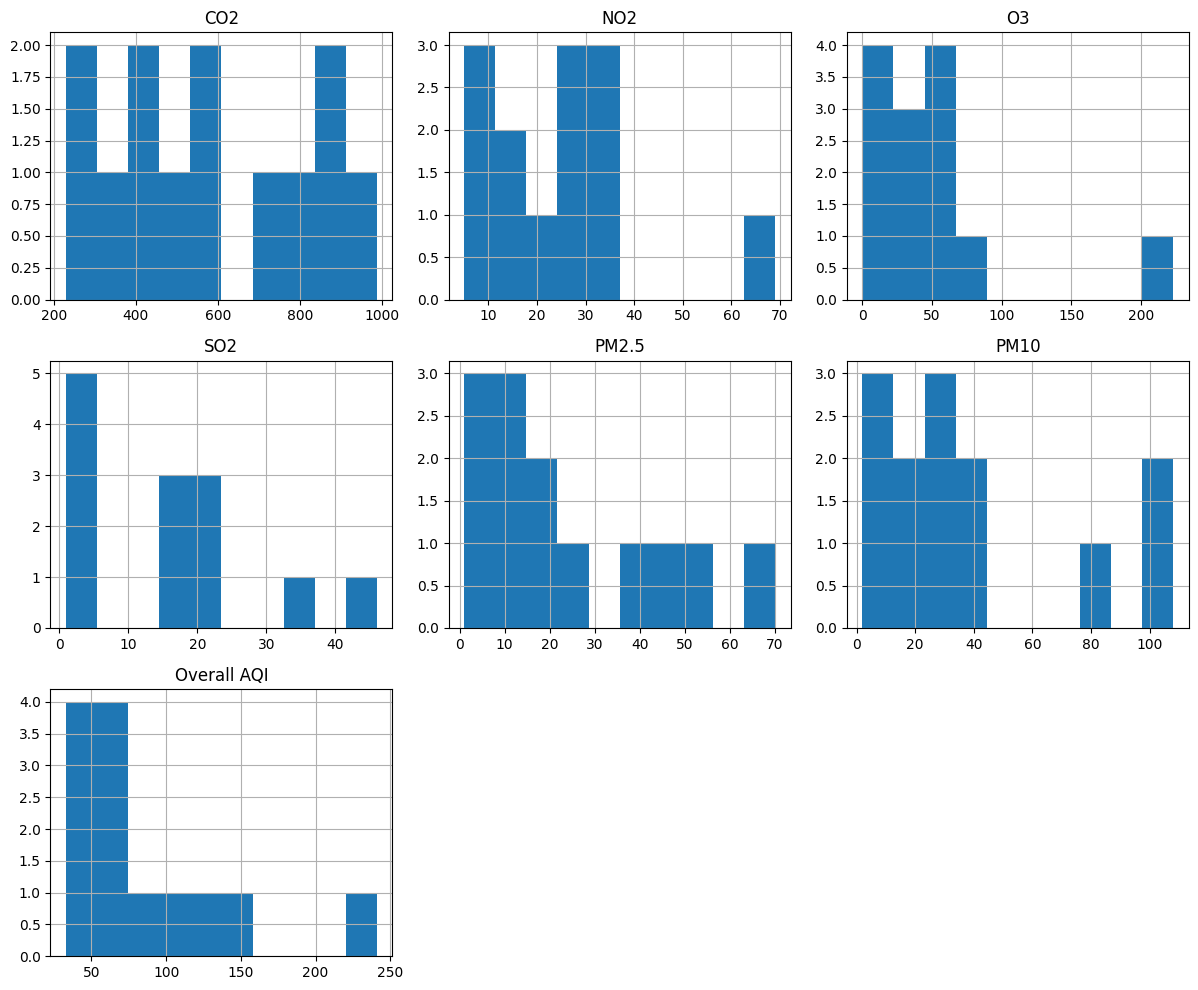

In [82]:
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

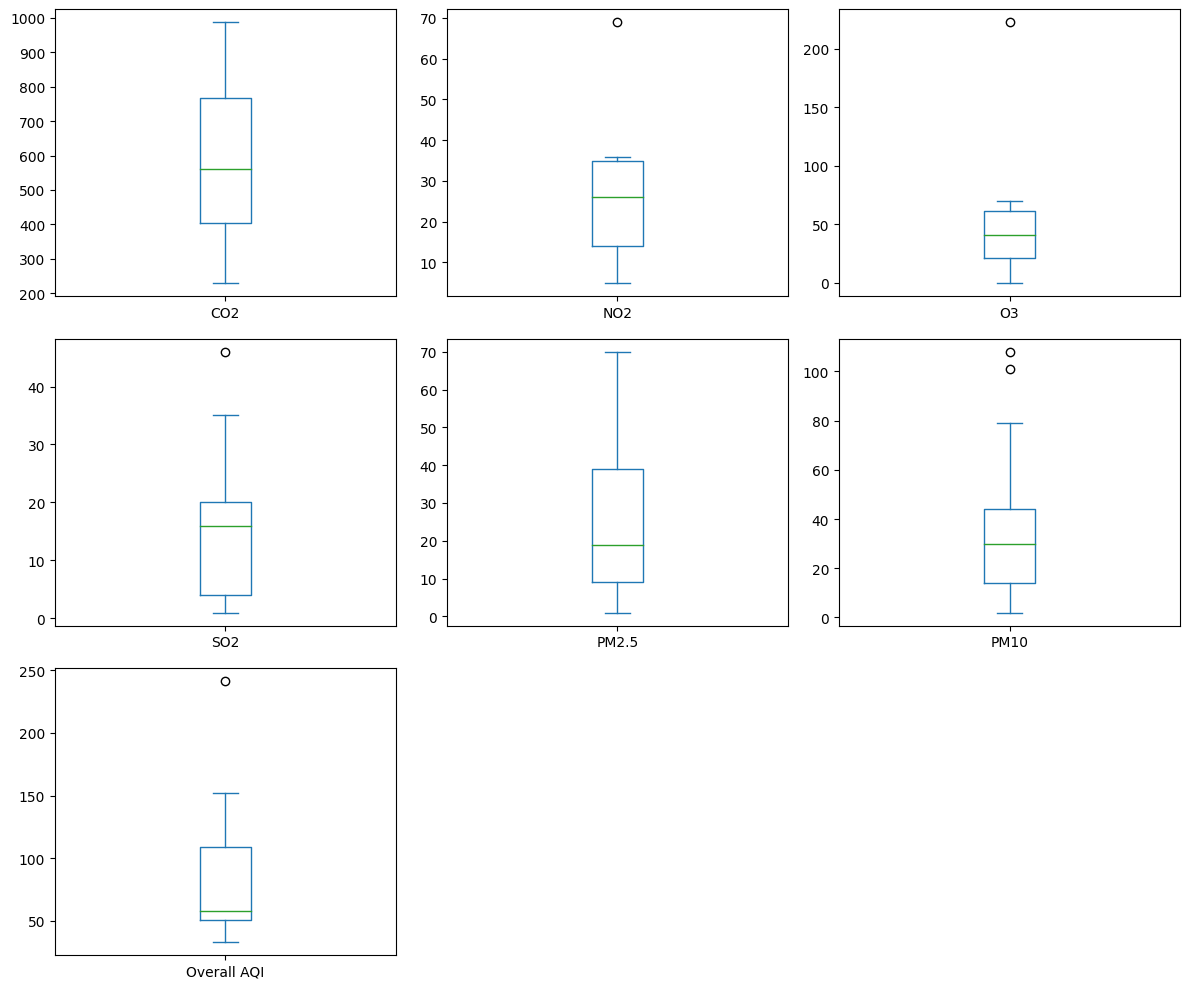

In [83]:
df.plot(kind='box', subplots=True, layout=(3, 3), figsize=(12, 10), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

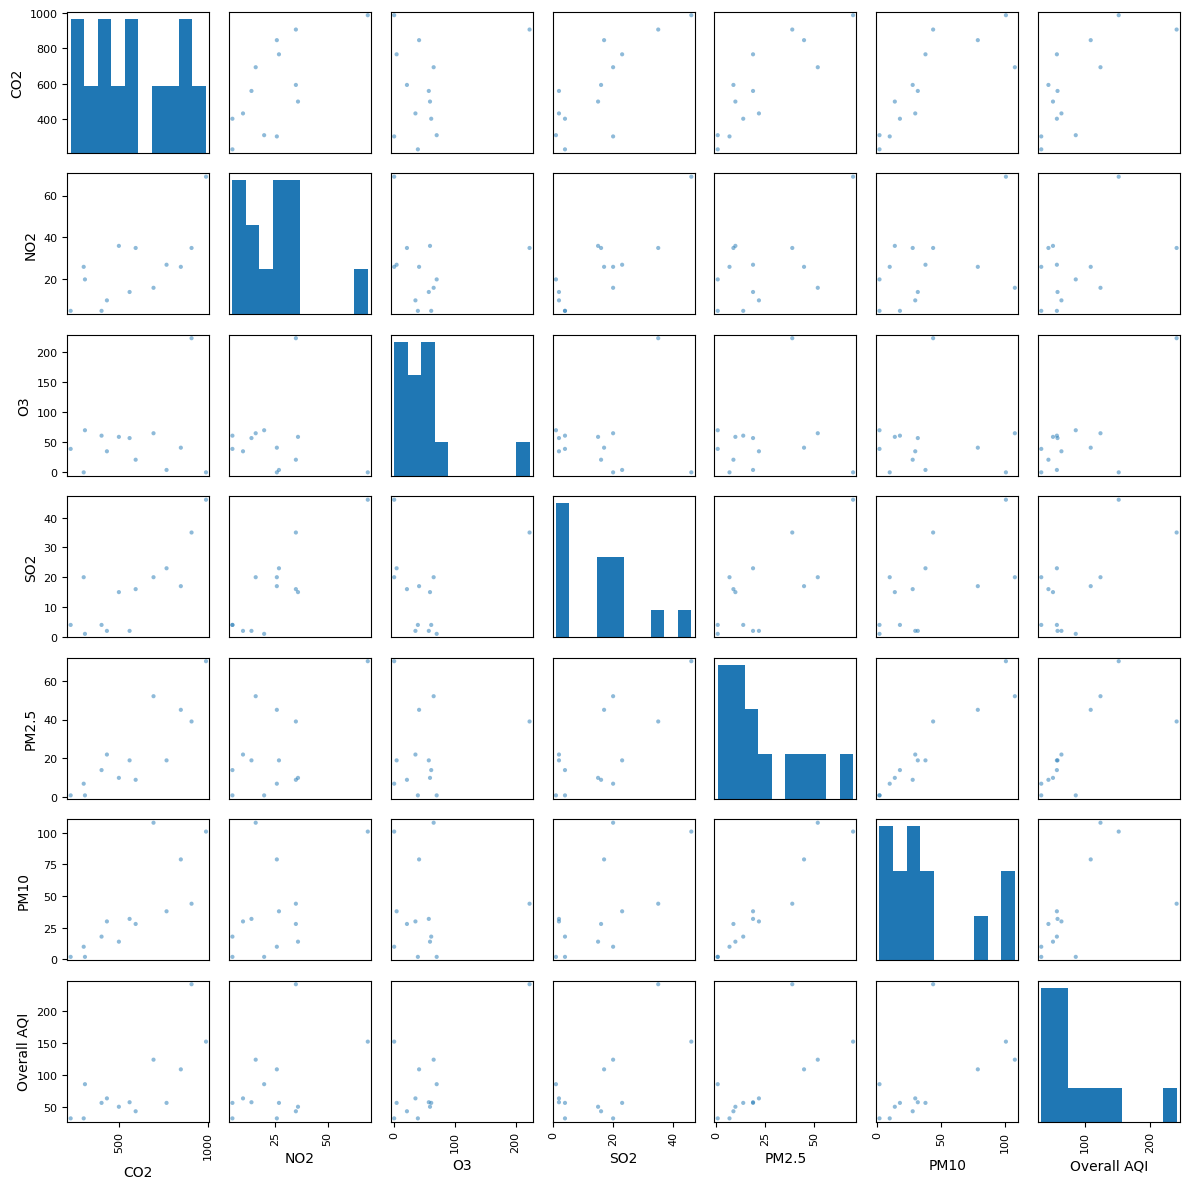

In [84]:
pd.plotting.scatter_matrix(df, figsize=(12, 12))
plt.tight_layout()
plt.show()

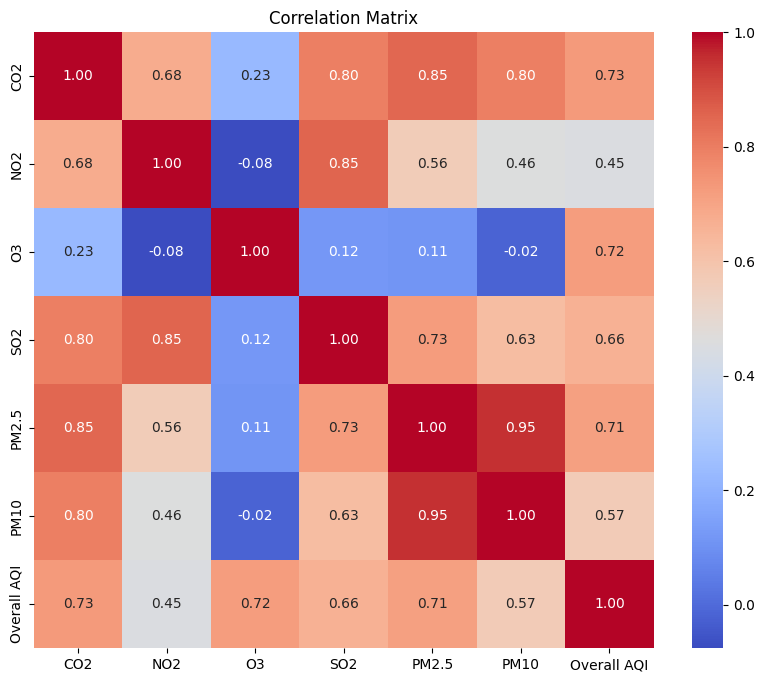

In [85]:
int_df = df.drop('City', axis=1)
int_df = int_df.drop('Country', axis=1)

correlation_matrix = int_df.corr()
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

### Data Visualizations

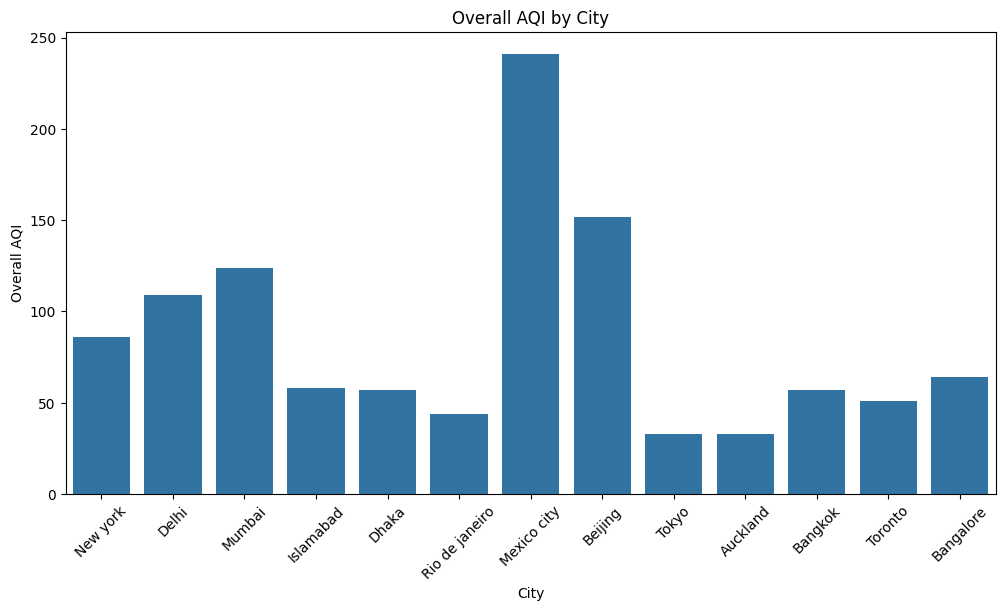

In [86]:
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Overall AQI', data=df)
plt.xticks(rotation=45)
plt.title('Overall AQI by City')
plt.xlabel('City')
plt.ylabel('Overall AQI')
plt.show()

This visualization provides a clear comparison of air quality levels by utilizing a bar plot to show the total Air Quality Index (AQI) across various cities.

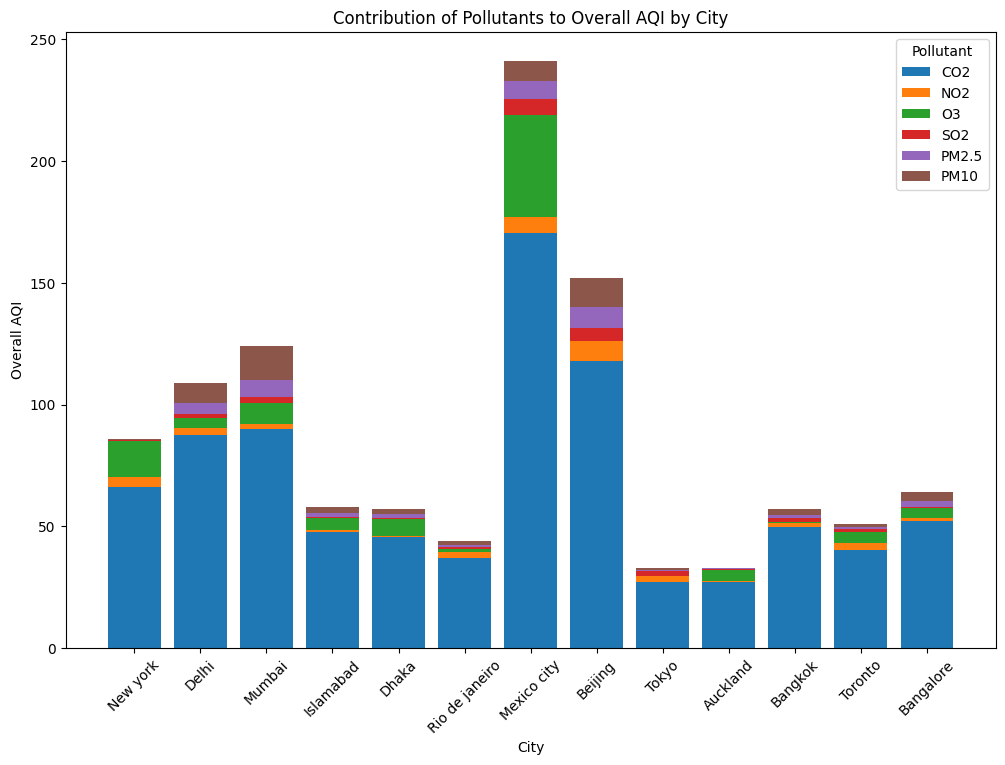

In [87]:
plt.figure(figsize=(12, 8))

df['Total_Pollutants'] = df[['CO2', 'NO2', 'O3', 'SO2', 'PM2.5', 'PM10']].sum(axis=1)
for pollutant in ['CO2', 'NO2', 'O3', 'SO2', 'PM2.5', 'PM10']:
    df[pollutant + '_Contribution'] = df[pollutant] / df['Total_Pollutants']

sns.barplot(x='City', y='Overall AQI', data=df, color='grey')
bottom = 0
for pollutant in ['CO2', 'NO2', 'O3', 'SO2', 'PM2.5', 'PM10']:
    plt.bar(df['City'], df[pollutant + '_Contribution'] * df['Overall AQI'], bottom=bottom, label=pollutant)
    bottom += df[pollutant + '_Contribution'] * df['Overall AQI']

plt.title('Contribution of Pollutants to Overall AQI by City')
plt.xlabel('City')
plt.ylabel('Overall AQI')
plt.xticks(rotation=45)
plt.legend(title='Pollutant')
plt.show()


The proportion of each pollutant to the total AQI is displayed using a stacked bar plot, which provides information on the relative effects of the various pollutants on different cities.

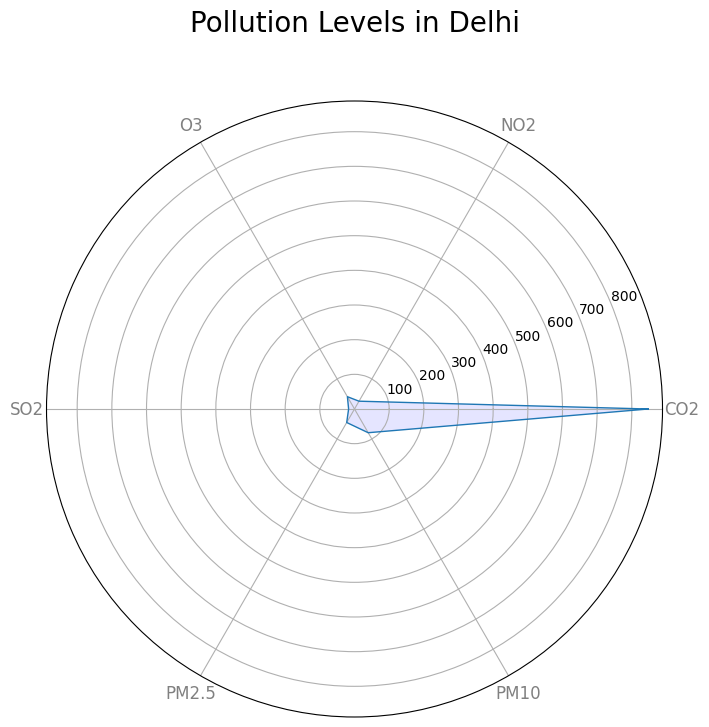

In [88]:
city = 'Delhi'

city_data = df[df['City'] == city][['CO2', 'NO2', 'O3', 'SO2', 'PM2.5', 'PM10']].mean()

categories = list(city_data.index)
N = len(categories)

values = city_data.values.tolist()
values += values[:1]
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

plt.xticks(angles[:-1], categories, color='grey', size=12)

ax.plot(angles, values, linewidth=1, linestyle='solid')

ax.fill(angles, values, 'b', alpha=0.1)

plt.title(f'Pollution Levels in {city}', size=20, color='black', y=1.1)

plt.show()



This visualization employed a radar graphic to display the pollution levels in Delhi, a particular city, providing a thorough overview of different pollutant concentrations.

<ipython-input-89-1c2ca55159d9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CO2', y='City', data=top_cities, palette='viridis')


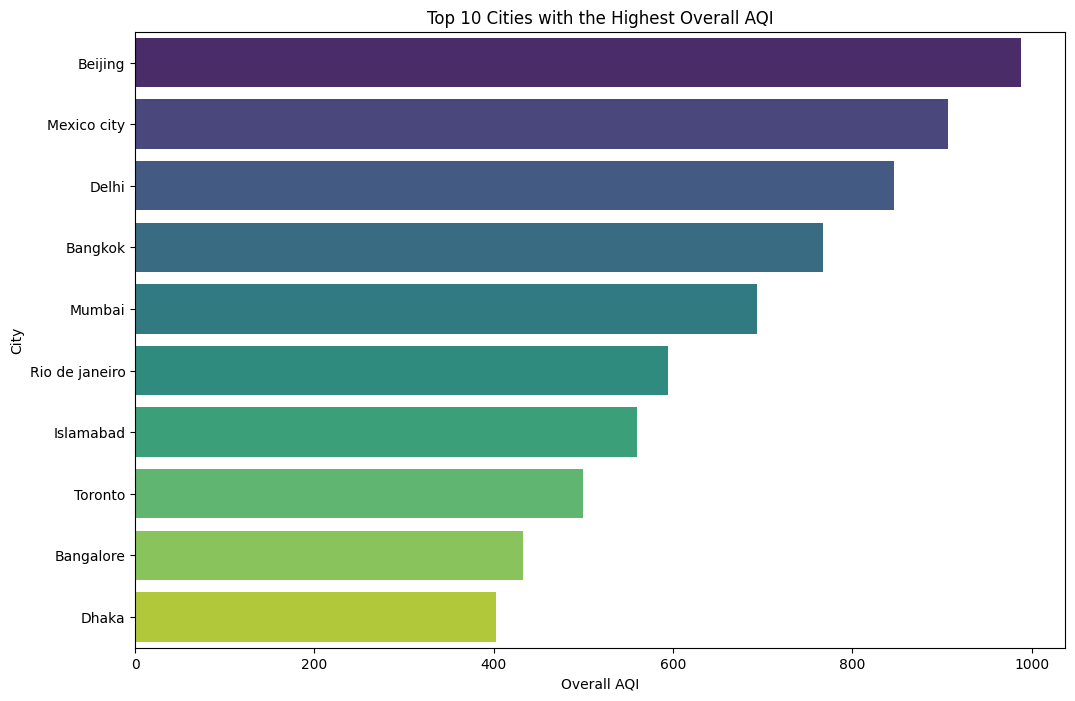

In [89]:
plt.figure(figsize=(12, 8))

top_cities = df.sort_values(by='CO2', ascending=False).head(10)

sns.barplot(x='CO2', y='City', data=top_cities, palette='viridis')
plt.title('Top 10 Cities with the Highest Overall AQI')
plt.xlabel('Overall AQI')
plt.ylabel('City')
plt.show()

In order to shine emphasis on major contributors to air pollution, a bar plot is also used to highlight the top 10 cities with the largest CO2 emissions.

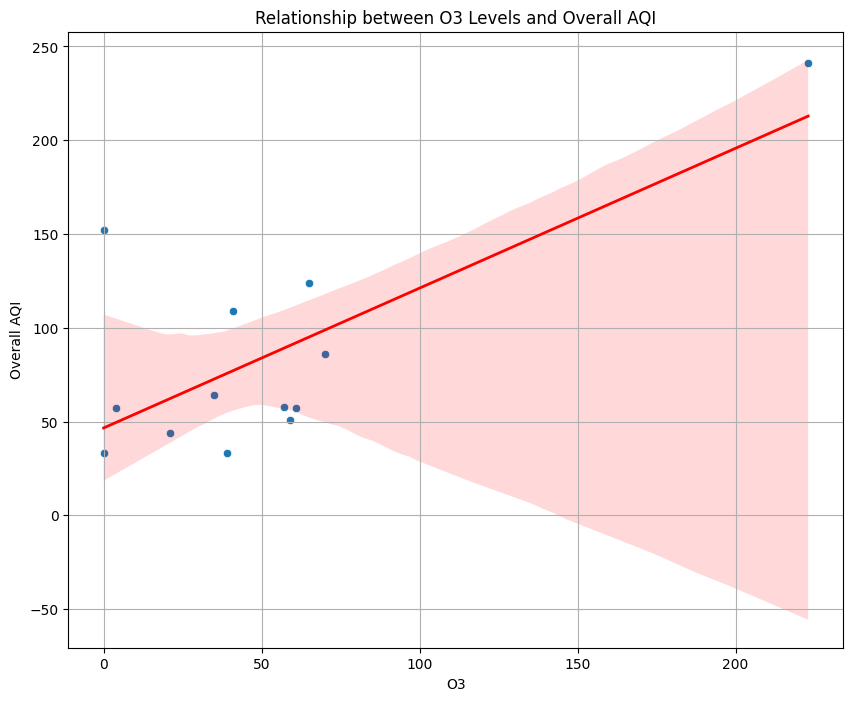

In [90]:
 plt.figure(figsize=(10, 8))

sns.scatterplot(x='O3', y='Overall AQI', data=df)
plt.title('Relationship between O3 Levels and Overall AQI')
plt.xlabel('O3 Levels')
plt.ylabel('Overall AQI')

sns.regplot(x='O3', y='Overall AQI', data=df, scatter=False, color='r', line_kws={'linewidth':2})

plt.grid(True)
plt.show()

In order to gain important insights into pollutant correlations and their effects on air quality, scatter plot is used to investigate associations between O3 levels and overall AQI.

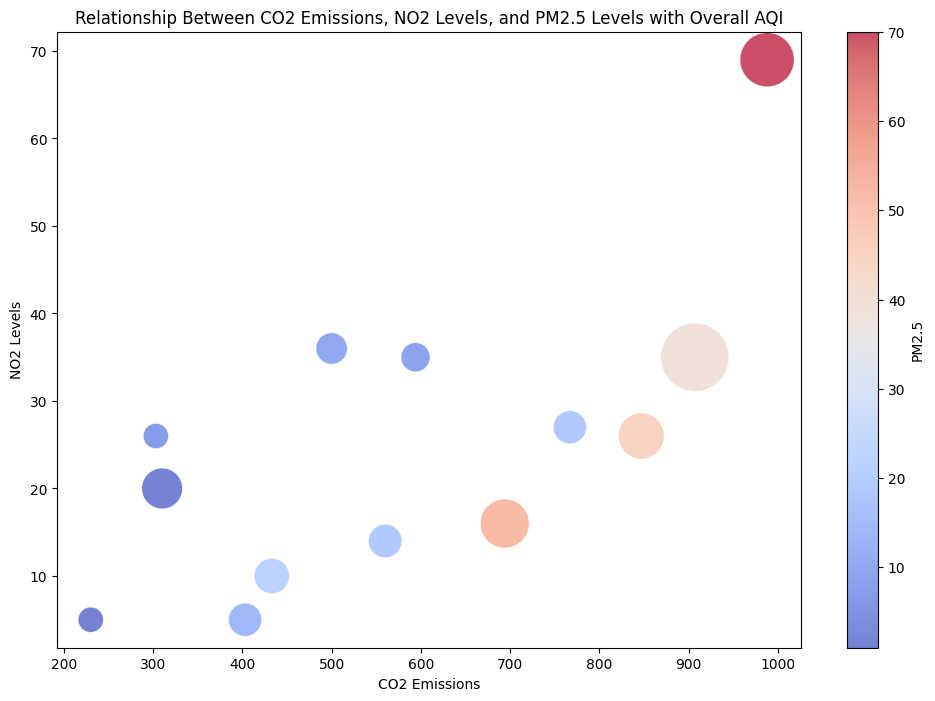

In [91]:
plt.figure(figsize=(12, 8))

x = 'CO2'
y = 'NO2'
size = 'Overall AQI'
color = 'PM2.5'

scatter = plt.scatter(df[x], df[y], s=df[size]*10, c=df[color], cmap='coolwarm', alpha=0.7, edgecolors='w', linewidth=0.5)

plt.colorbar(scatter, label='PM2.5')

plt.title('Relationship Between CO2 Emissions, NO2 Levels, and PM2.5 Levels with Overall AQI')
plt.xlabel('CO2 Emissions')
plt.ylabel('NO2 Levels')

plt.show()


The correlations between CO2 emissions, NO2 levels, PM2.5 concentrations, and Overall AQI were efficiently represented by this bubble graphic, which offered a comprehensive view of the dynamics of pollution across various metropolitan settings.

## K-Means Clustering

In [92]:
features = df[['CO2', 'NO2', 'O3',
                 'SO2', 'PM2.5', 'PM10', 'Overall AQI']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [93]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=27)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

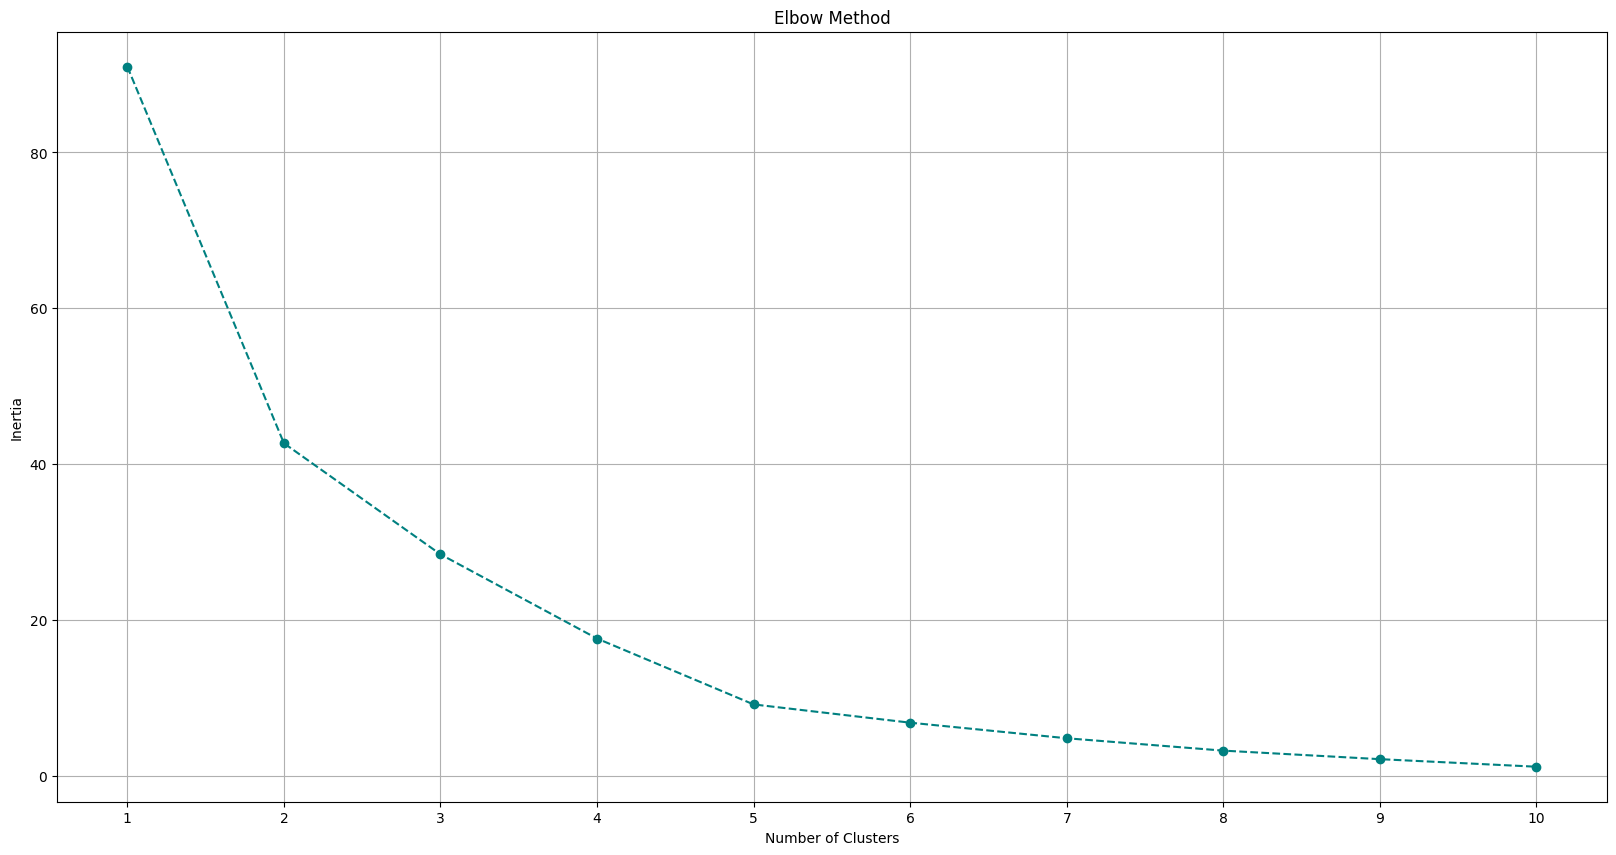

In [94]:
plt.figure(figsize=(20, 10))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--', color = 'teal')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [95]:
optimal_clusters = 2

kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=27)
data['Cluster'] = kmeans.fit_predict(scaled_features)

print(data)

{'CO': {'concentration': 433.92, 'aqi': 4}, 'NO2': {'concentration': 10.11, 'aqi': 12}, 'O3': {'concentration': 35.76, 'aqi': 30}, 'SO2': {'concentration': 2.92, 'aqi': 4}, 'PM2.5': {'concentration': 22.77, 'aqi': 64}, 'PM10': {'concentration': 30.2, 'aqi': 27}, 'overall_aqi': 64, 'Cluster': array([0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int32)}


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [96]:
optimal_clusters = 3

kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=27)
data['Cluster'] = kmeans.fit_predict(scaled_features)

print(data)

{'CO': {'concentration': 433.92, 'aqi': 4}, 'NO2': {'concentration': 10.11, 'aqi': 12}, 'O3': {'concentration': 35.76, 'aqi': 30}, 'SO2': {'concentration': 2.92, 'aqi': 4}, 'PM2.5': {'concentration': 22.77, 'aqi': 64}, 'PM10': {'concentration': 30.2, 'aqi': 27}, 'overall_aqi': 64, 'Cluster': array([2, 0, 0, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2], dtype=int32)}


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [97]:
optimal_clusters = 4

kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=27)
data['Cluster'] = kmeans.fit_predict(scaled_features)

print(data)

{'CO': {'concentration': 433.92, 'aqi': 4}, 'NO2': {'concentration': 10.11, 'aqi': 12}, 'O3': {'concentration': 35.76, 'aqi': 30}, 'SO2': {'concentration': 2.92, 'aqi': 4}, 'PM2.5': {'concentration': 22.77, 'aqi': 64}, 'PM10': {'concentration': 30.2, 'aqi': 27}, 'overall_aqi': 64, 'Cluster': array([0, 3, 3, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0], dtype=int32)}


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [98]:
optimal_clusters = 5

kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=27)
data['Cluster'] = kmeans.fit_predict(scaled_features)

print(data)

{'CO': {'concentration': 433.92, 'aqi': 4}, 'NO2': {'concentration': 10.11, 'aqi': 12}, 'O3': {'concentration': 35.76, 'aqi': 30}, 'SO2': {'concentration': 2.92, 'aqi': 4}, 'PM2.5': {'concentration': 22.77, 'aqi': 64}, 'PM10': {'concentration': 30.2, 'aqi': 27}, 'overall_aqi': 64, 'Cluster': array([0, 3, 3, 0, 0, 4, 1, 2, 4, 0, 4, 4, 0], dtype=int32)}


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#### Silhouette Method

In [99]:
cluster_range = range(2, 10)

silhouette_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=27)
    cluster_labels = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [100]:
silhouette_scores

[0.4611192352833848,
 0.4446756829801573,
 0.4060854535720723,
 0.3439341323204079,
 0.29545775021037696,
 0.2621218053357107,
 0.24449653064973267,
 0.2241342801345677]

In [101]:
silhouette_avg

0.2241342801345677

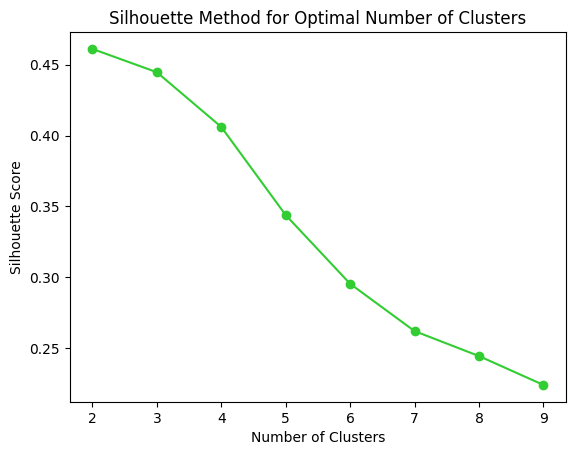

In [102]:
plt.plot(cluster_range, silhouette_scores, marker='o', color = 'limegreen')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal Number of Clusters')
plt.show()

In [103]:
kmeans = KMeans(n_clusters=3).fit(scaled_features)
df['kmeans_cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [104]:
kmeans

KMeans(n_clusters=3)

In [105]:
df['kmeans_cluster']

0     0
1     1
2     1
3     0
4     0
5     0
6     2
7     1
8     0
9     0
10    0
11    0
12    0
Name: kmeans_cluster, dtype: int32

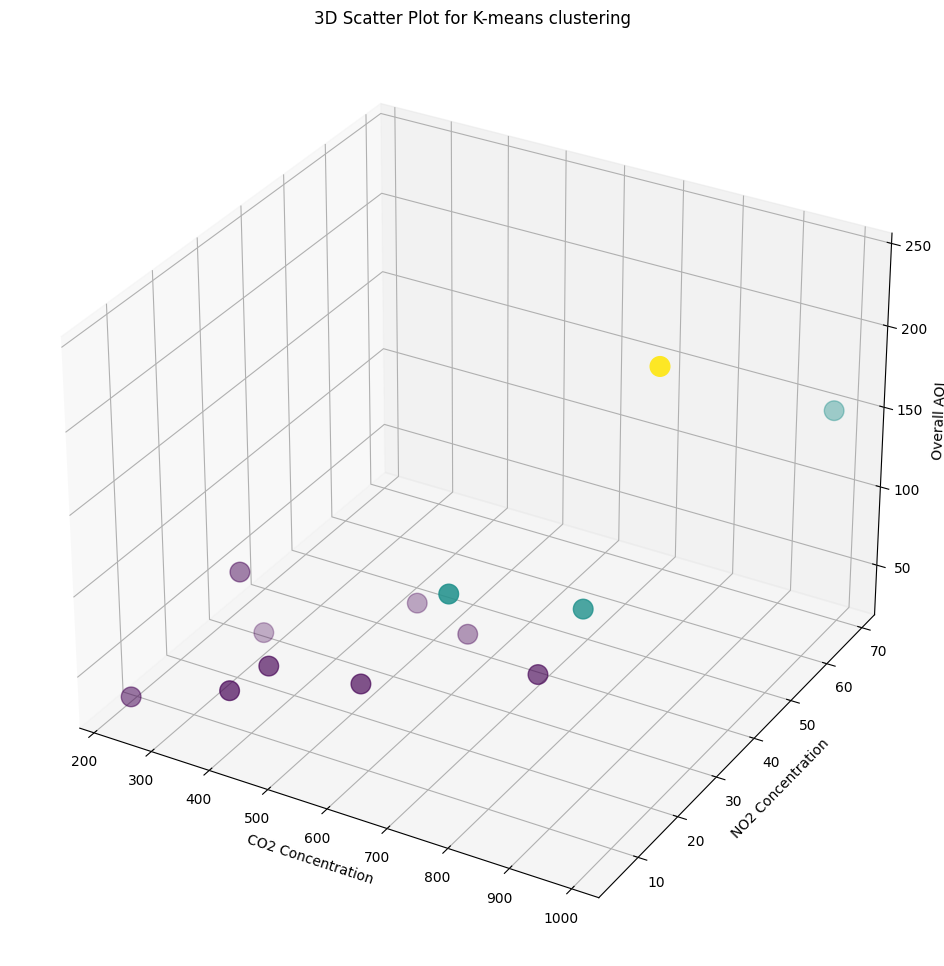

In [106]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

x = df['CO2']
y = df['NO2']
z = df['Overall AQI']
c = df['kmeans_cluster']

ax.scatter(x, y, z, c=c, cmap='viridis', s=200)

ax.set_xlabel('CO2 Concentration')
ax.set_ylabel('NO2 Concentration')
ax.set_zlabel('Overall AQI')

plt.title('3D Scatter Plot for K-means clustering')

plt.show()


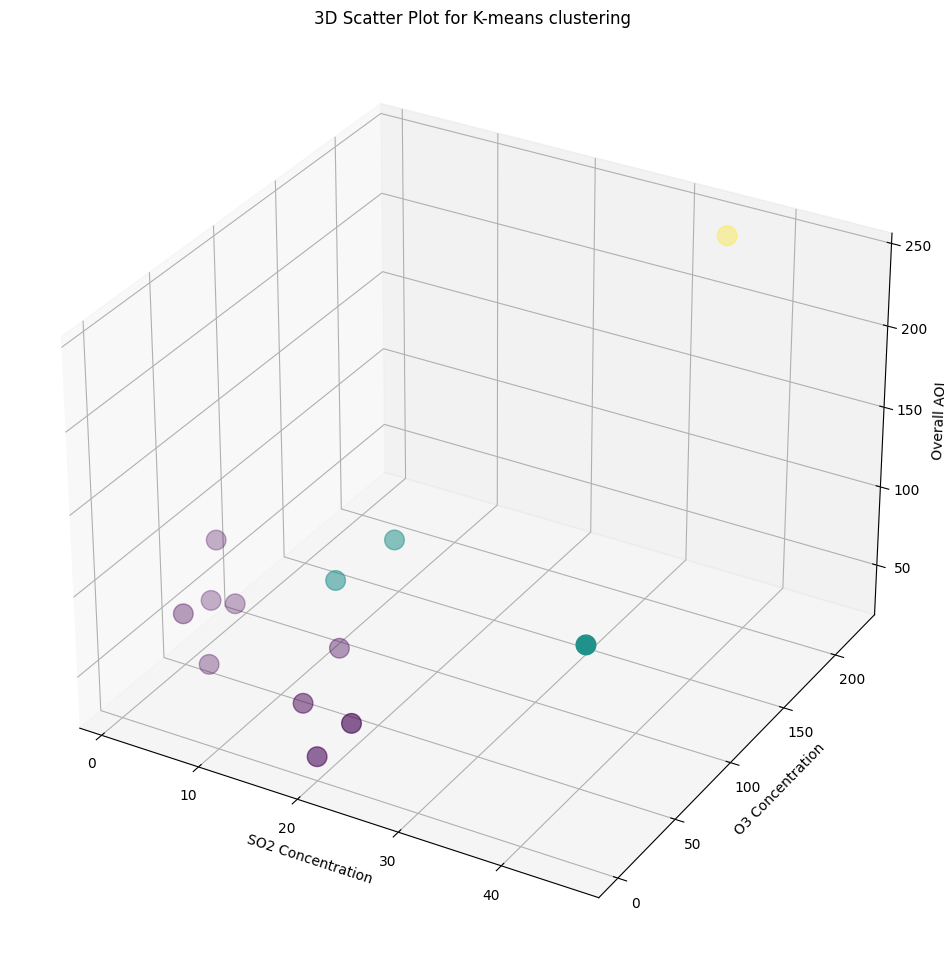

In [107]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

x = df['SO2']
y = df['O3']
z = df['Overall AQI']
c = df['kmeans_cluster']

ax.scatter(x, y, z, c=c, cmap='viridis', s=200)

ax.set_xlabel('SO2 Concentration')
ax.set_ylabel('O3 Concentration')
ax.set_zlabel('Overall AQI')

plt.title('3D Scatter Plot for K-means clustering')

plt.show()

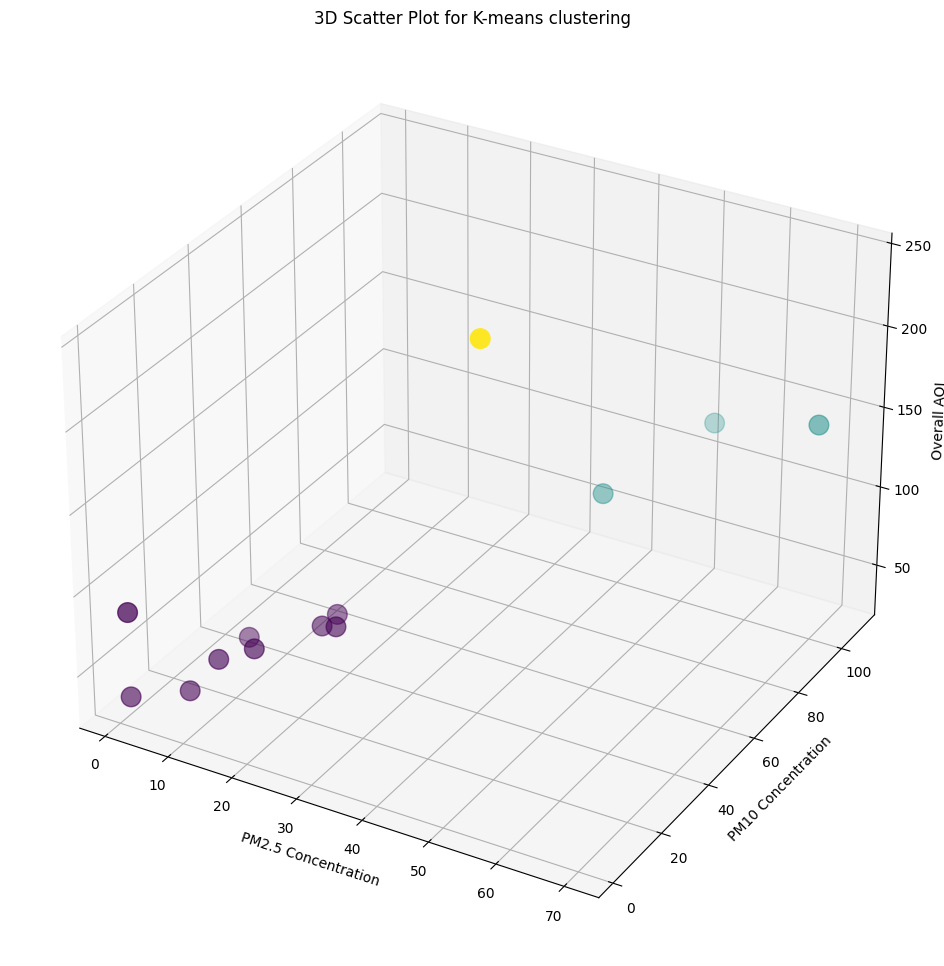

In [108]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

x = df['PM2.5']
y = df['PM10']
z = df['Overall AQI']
c = df['kmeans_cluster']

ax.scatter(x, y, z, c=c, cmap='viridis', s=200)

ax.set_xlabel('PM2.5 Concentration')
ax.set_ylabel('PM10 Concentration')
ax.set_zlabel('Overall AQI')

plt.title('3D Scatter Plot for K-means clustering')

plt.show()

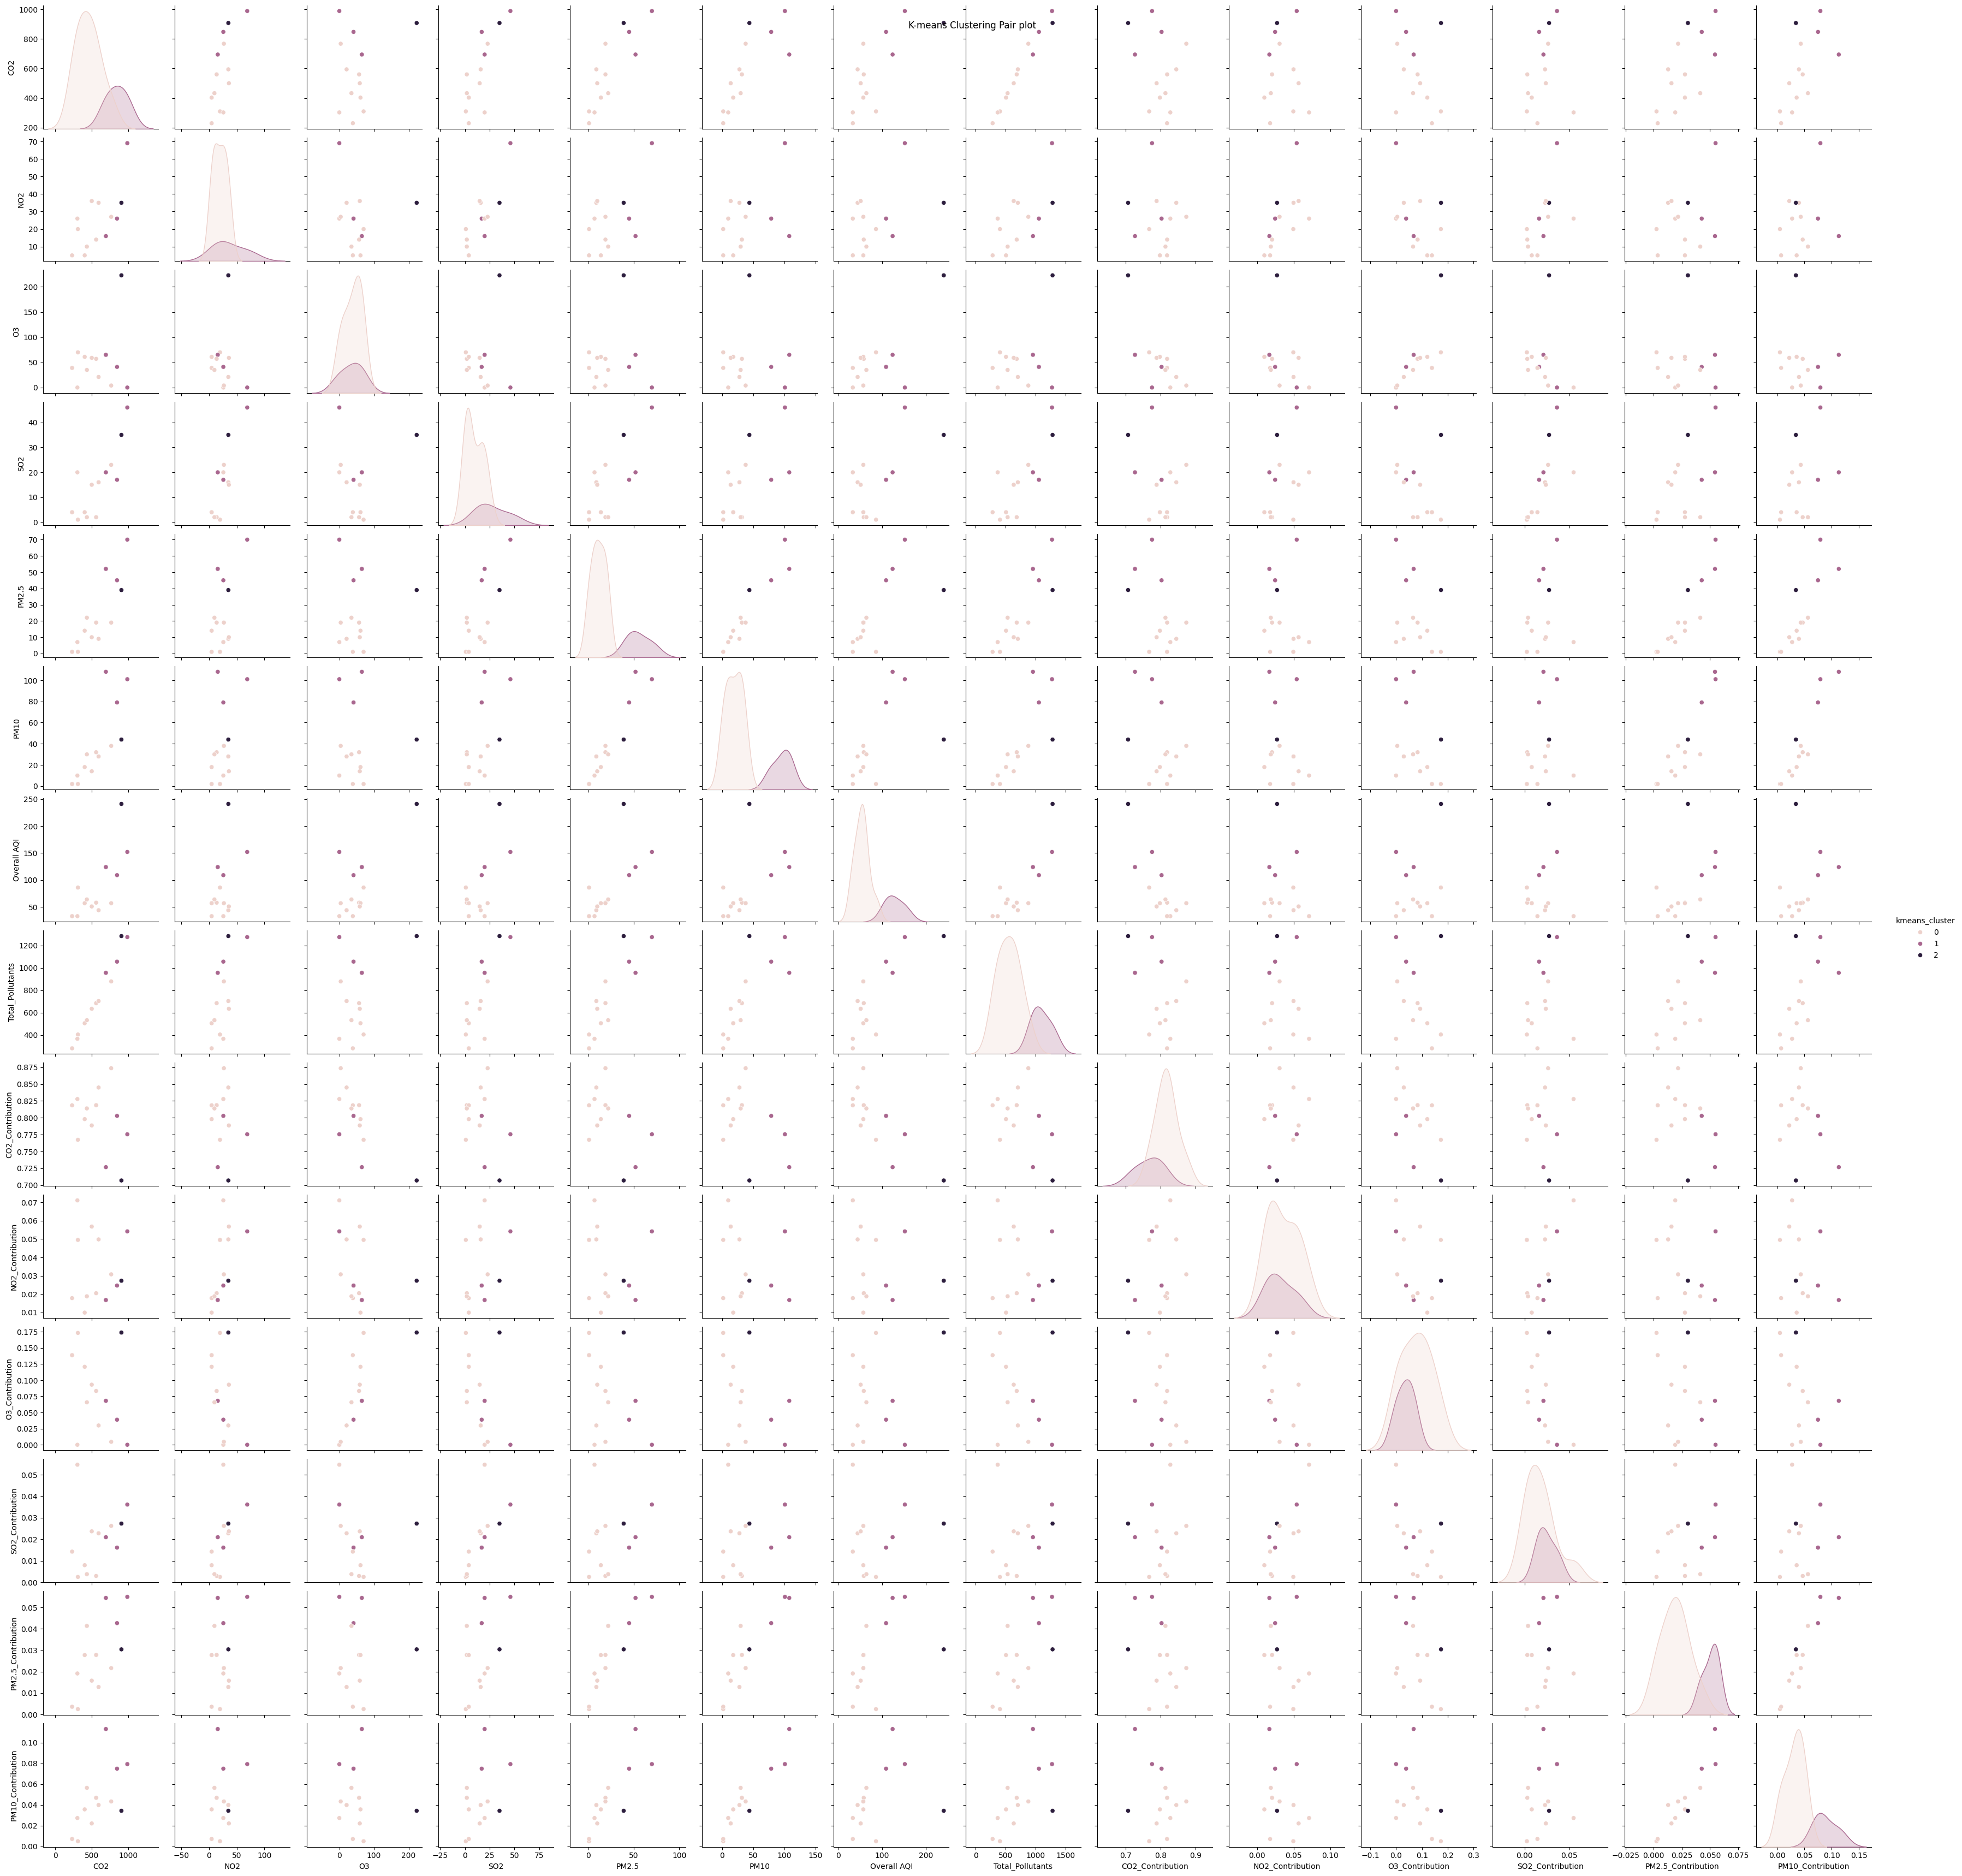

In [109]:
sns.pairplot(df, hue='kmeans_cluster', diag_kind='kde')
plt.suptitle('K-means Clustering Pair plot')
plt.show()

In [110]:
cosine_sim = cosine_similarity(scaled_features)

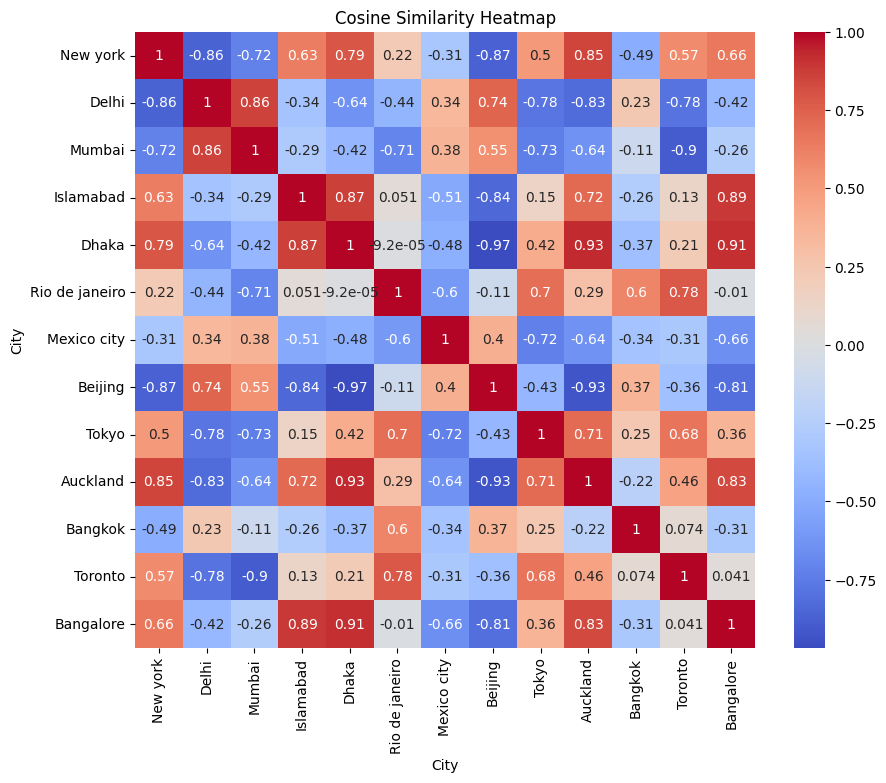

In [111]:
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim, annot=True, xticklabels=df['City'], yticklabels=df['City'], cmap='coolwarm')
plt.title('Cosine Similarity Heatmap')
plt.xlabel('City')
plt.ylabel('City')
plt.show()

### Hierarchical Clustering

In [112]:
linkage_matrix = linkage(cosine_sim, "average")

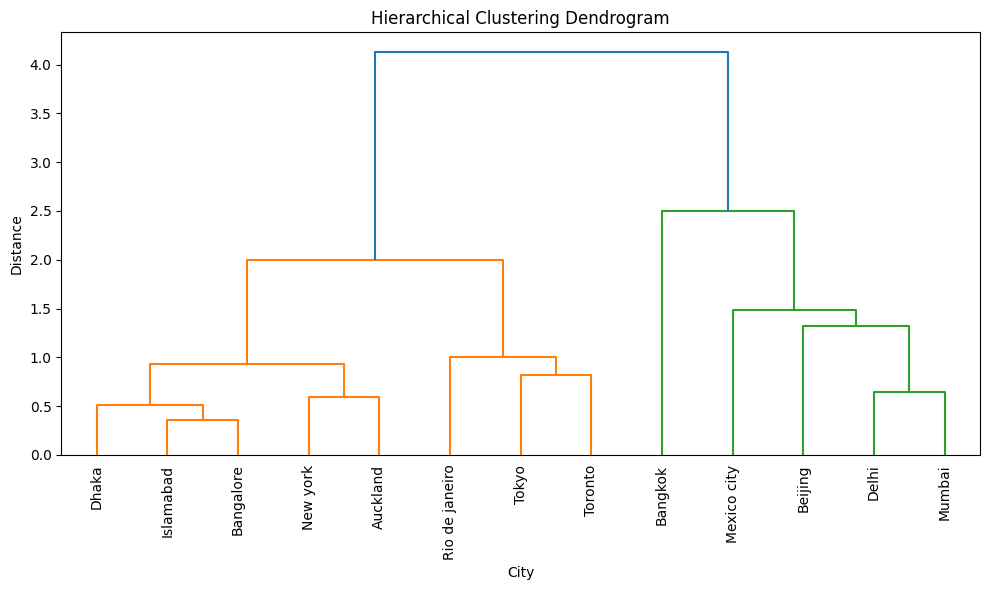

In [113]:
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=df['City'].values, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('City')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

In [114]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='cosine', linkage='average')
cluster.fit_predict(scaled_features)

df['Cluster'] = cluster.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [115]:
df

,City,Country,CO2,NO2,O3,SO2,PM2.5,PM10,Overall AQI,Total_Pollutants,CO2_Contribution,NO2_Contribution,O3_Contribution,SO2_Contribution,PM2.5_Contribution,PM10_Contribution,kmeans_cluster,Cluster
0,New york,United States,310,20,70,1,1,2,86,404,0.767327,0.049505,0.173267,0.002475,0.002475,0.004950,0,2
1,Delhi,India,847,26,41,17,45,79,109,1055,0.802844,0.024645,0.038863,0.016114,0.042654,0.074882,1,1
2,Mumbai,India,694,16,65,20,52,108,124,955,0.726702,0.016754,0.068063,0.020942,0.054450,0.113089,1,1
3,Islamabad,Pakistan,560,14,57,2,19,32,58,684,0.818713,0.020468,0.083333,0.002924,0.027778,0.046784,0,2
4,Dhaka,Bangladesh,403,5,61,4,14,18,57,505,0.798020,0.009901,0.120792,0.007921,0.027723,0.035644,0,2
5,Rio de janeiro,Brazil,594,35,21,16,9,28,44,703,0.844950,0.049787,0.029872,0.022760,0.012802,0.039829,0,0
6,Mexico city,Mexico,907,35,223,35,39,44,241,1283,0.706937,0.027280,0.173811,0.027280,0.030398,0.034295,2,1
7,Beijing,China,988,69,0,46,70,101,152,1274,0.775510,0.054160,0.000000,0.036107,0.054945,0.079278,1,1
8,Tokyo,Japan,303,26,0,20,7,10,33,366,0.827869,0.071038,0.000000,0.054645,0.019126,0.027322,0,0
9,Auckland,New Zealand,230,5,39,4,1,2,33,281,0.818505,0.017794,0.138790,0.014235,0.003559,0.007117,0,2


### Principal Component Analysis

In [116]:
pca = PCA()
principal_components = pca.fit_transform(scaled_features)

principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])
principal_df[['City', 'Country']] = df[['City', 'Country']]
principal_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,City,Country
0,-1.936472,0.826714,-0.476143,-0.226248,-0.584981,-0.106398,0.301974,New york,United States
1,1.610393,-0.339921,1.027887,0.420185,-0.117674,-0.087259,0.033611,Delhi,India
2,1.847367,0.104048,1.831914,-0.439606,0.190141,0.361421,0.115684,Mumbai,India
3,-1.060457,0.240587,0.624419,0.458141,-0.274252,0.032038,-0.138766,Islamabad,Pakistan
4,-1.746707,0.542709,0.546787,-0.030571,0.140415,-0.103365,-0.167098,Dhaka,Bangladesh
5,-0.539646,-0.839254,-0.759566,0.419259,-0.065571,0.263123,0.136623,Rio de janeiro,Brazil
6,3.267835,3.274021,-0.895694,0.028443,0.224325,-0.044320,-0.016180,Mexico city,Mexico
7,4.692451,-1.877038,-0.561169,-0.385431,-0.295463,-0.170251,-0.077049,Beijing,China
8,-1.520218,-0.984101,-0.884591,-0.611843,0.409773,-0.012039,-0.005079,Tokyo,Japan
9,-2.742282,0.188449,0.061936,-0.358689,0.260004,-0.045430,-0.026846,Auckland,New Zealand


In [117]:
distances = pairwise_distances(principal_components, metric='cosine')

In [118]:
distance_df = pd.DataFrame(distances, columns=principal_df['City'], index=principal_df['City'])
print("Distance Matrix:")
print(distance_df)

Distance Matrix:
City            New york     Delhi    Mumbai  Islamabad     Dhaka  \
City                                                                
New york        0.000000  1.861650  1.721053   0.367965  0.209127   
Delhi           1.861650  0.000000  0.138470   1.340993  1.642307   
Mumbai          1.721053  0.138470  0.000000   1.286002  1.424555   
Islamabad       0.367965  1.340993  1.286002   0.000000  0.131016   
Dhaka           0.209127  1.642307  1.424555   0.131016  0.000000   
Rio de janeiro  0.782630  1.443865  1.705993   0.948572  1.000092   
Mexico city     1.311133  0.657423  0.623593   1.508128  1.482776   
Beijing         1.871606  0.262807  0.452252   1.837823  1.967860   
Tokyo           0.497181  1.778762  1.729987   0.853545  0.584478   
Auckland        0.152154  1.828471  1.636996   0.277229  0.070478   
Bangkok         1.488610  0.768083  1.112041   1.261924  1.370111   
Toronto         0.425830  1.784638  1.895146   0.871345  0.785391   
Bangalore       0

In [119]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

Explained Variance Ratio: [0.6500934  0.19992624 0.1062089  0.02133203 0.01452867 0.00524481
 0.00266595]


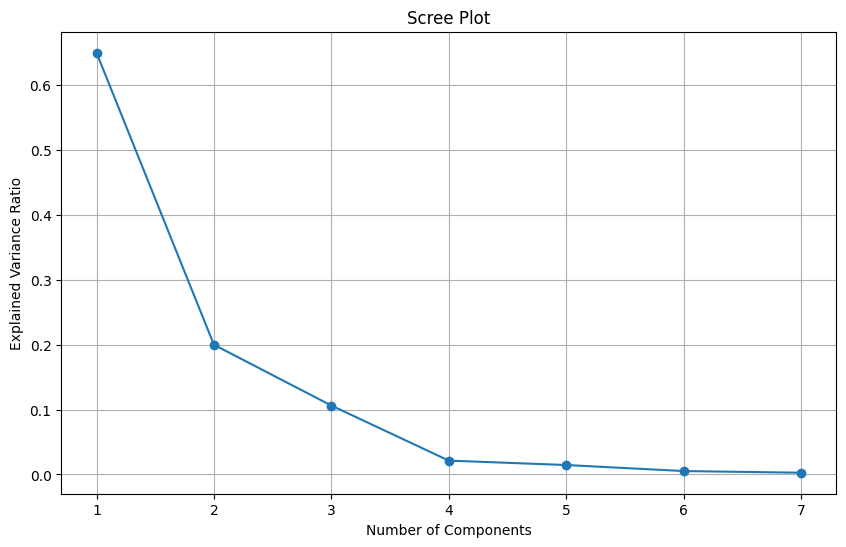

In [120]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.xticks(np.arange(1, pca.n_components_ + 1))
plt.grid(True)
plt.show()

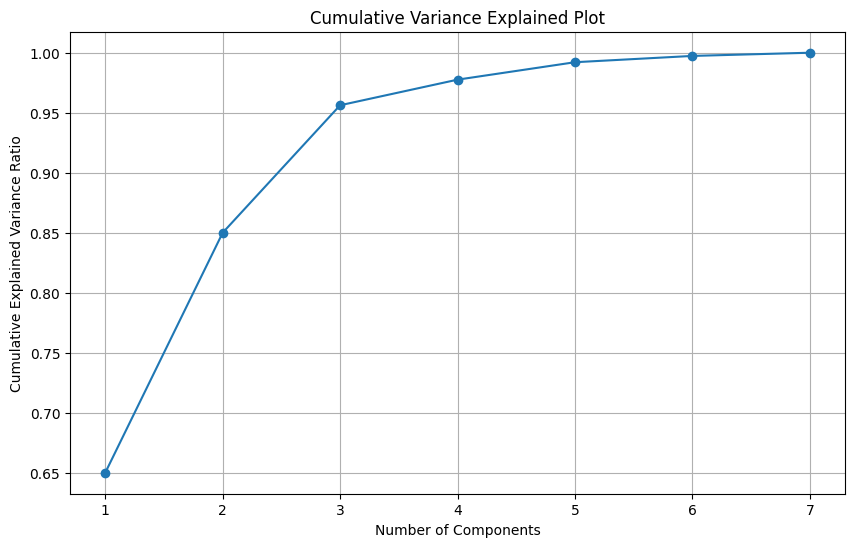

In [121]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, pca.n_components_ + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Variance Explained Plot')
plt.xticks(np.arange(1, pca.n_components_ + 1))
plt.grid(True)
plt.show()

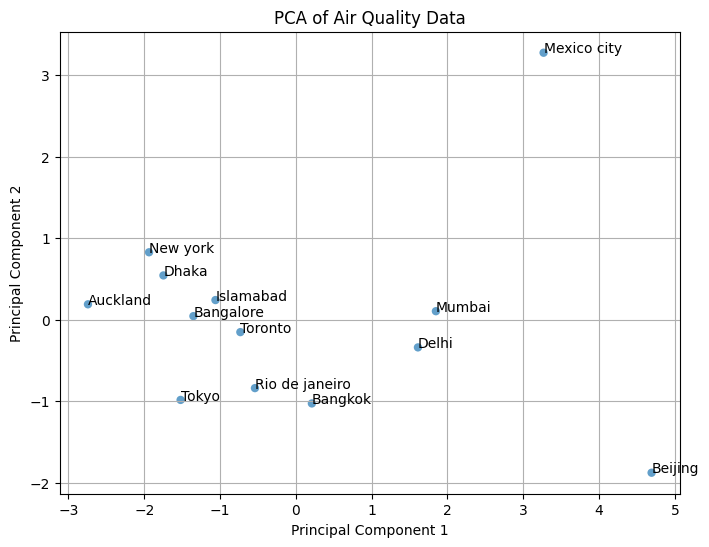

In [122]:
plt.figure(figsize=(8, 6))
plt.scatter(principal_df['PC1'], principal_df['PC2'], edgecolor='none', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Air Quality Data')
for i, city in enumerate(principal_df['City']):
    plt.text(principal_df.loc[i, 'PC1'], principal_df.loc[i, 'PC2'], city)
plt.grid(True)
plt.show()


## Naive Bayes

In [123]:
second_df = pd.DataFrame({
    'Date': [],
    'CO': []
})


for i in range(0, 336):
    api_url = 'https://air-quality-api.open-meteo.com/v1/air-quality?latitude=28.6358&longitude=77.2245&current=carbon_monoxide&hourly=carbon_monoxide&timezone=auto&past_days=7&forecast_days=7'
    response = requests.get(api_url)
    data = response.json()
    if response.status_code != requests.codes.ok:
        print("Error:", response.status_code, response.text)

    # print(data)

    new_row = {
        'Date': data['hourly']['time'][i],
        'CO': data['hourly']['carbon_monoxide'][i]
    }

    second_df.loc[len(second_df)] = new_row

second_df.dropna(subset=['CO'], inplace=True)

second_df[['Date', 'Time']] = second_df['Date'].str.split('T', expand=True)
threshold = second_df['CO'].quantile(0.80)
second_df['Air Quality'] = (second_df['CO'] > threshold).astype(int)
second_df.head(10)

,Date,CO,Time,Air Quality
0,2024-04-01,325.0,00:00,0
1,2024-04-01,300.0,01:00,0
2,2024-04-01,285.0,02:00,0
3,2024-04-01,279.0,03:00,0
4,2024-04-01,282.0,04:00,0
5,2024-04-01,332.0,05:00,0
6,2024-04-01,392.0,06:00,0
7,2024-04-01,470.0,07:00,0
8,2024-04-01,501.0,08:00,0
9,2024-04-01,438.0,09:00,0


In [130]:
label_encoders = {}
for column in ['Date', 'Time', 'CO']:
    label_encoder = LabelEncoder()
    second_df[column] = label_encoder.fit_transform(second_df[column])
    label_encoders[column] = label_encoder

X = second_df[['Date', 'Time', 'CO']]
y = second_df['Air Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

In [129]:
X_train, X_test, y_train, y_test

(     Date  Time   CO
 38      1    14    8
 71      2    23   89
 61      2    13   43
 172     7     4  113
 49      2     1   96
 ..    ...   ...  ...
 24      1     0  102
 240    10     0  131
 31      1     7  117
 184     7    16   13
 19      0    19  123
 
 [225 rows x 3 columns],
      Date  Time   CO
 260    10    20  204
 253    10    13   53
 3       0     3   36
 231     9    15   46
 8       0     8  120
 247    10     7  217
 228     9    12   41
 70      2    22  114
 157     6    13    2
 254    10    14   50
 104     4     8  158
 221     9     5  195
 168     7     0  150
 278    11    14   45
 107     4    11   75
 105     4     9  140
 54      2     6  124
 88      3    16   18
 166     6    22  179
 180     7    12   23
 269    11     5  148
 63      2    15   66
 119     4    23  176
 164     6    20  186
 229     9    13   32
 160     6    16    9
 202     8    10  193
 261    10    21  201
 199     8     7  231
 5       0     5   64
 142     5    22  153
 186 

In [131]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9824561403508771

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        46
           1       0.92      1.00      0.96        11

    accuracy                           0.98        57
   macro avg       0.96      0.99      0.97        57
weighted avg       0.98      0.98      0.98        57

Confusion Matrix:
 [[45  1]
 [ 0 11]]


##Decision Tree

In [127]:
clf = DecisionTreeClassifier(max_depth=3, min_samples_split=2, min_samples_leaf=1)

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

y_pred_cv = cross_val_predict(clf, X, y, cv=5)

cv_scores = cross_val_score(clf, X, y, cv=5)
print("Accuracy:", cv_scores.mean())

print("Classification Report:")
print(classification_report(y, y_pred_cv))

conf_matrix = confusion_matrix(y, y_pred_cv)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9964285714285713
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       225
           1       1.00      0.98      0.99        57

    accuracy                           1.00       282
   macro avg       1.00      0.99      0.99       282
weighted avg       1.00      1.00      1.00       282

Confusion Matrix:
[[225   0]
 [  1  56]]
